In [3]:
# Import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split


# Load the scraped data
df = pd.read_csv("delhiclean.csv")

# Define the features and target
X = df[["distance", "ratings", "wifi"]]
y = df["price"]

# Normalize the features
X = (X - X.mean()) / X.std()

# Reshape the data into sequences of length 10
# Each sequence contains 10 consecutive days of data
X_seq = np.array([X[i:i+10] for i in range(len(X)-10)])
y_seq = np.array([y[i+10] for i in range(len(y)-10)])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Create and fit the model
model = keras.Sequential([
  layers.SimpleRNN(32, activation="relu", input_shape=(10, 3)),
  layers.Dense(1)
])
model.compile(optimizer="adam", loss="mse", metrics=["mae"])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.2f}")

# Predict the price for the next day
# Assume we have a new hotel with distance = 5 km, ratings = 3, and wifi = 1
#new_hotel = np.array([[5, 3, 1]])
#new_hotel = (new_hotel - X.mean()) / X.std()
#new_hotel = new_hotel.reshape(1, 3, 1)
##new_hotel = new_hotel.reshape(1, 1, 3)
#new_price = model.predict(new_hotel)
#print(f"Predicted price for the new hotel: {new_price[0][0]:.2f}")


Epoch 1/10
2/2 [==============================] - 2s 317ms/step - loss: 1096957.8750 - mae: 943.5599 - val_loss: 1617116.0000 - val_mae: 1004.4245
Epoch 2/10
2/2 [==============================] - 0s 52ms/step - loss: 1096788.8750 - mae: 943.4708 - val_loss: 1616940.6250 - val_mae: 1004.3469
Epoch 3/10
2/2 [==============================] - 0s 49ms/step - loss: 1096635.2500 - mae: 943.3914 - val_loss: 1616789.3750 - val_mae: 1004.2785
Epoch 4/10
2/2 [==============================] - 0s 52ms/step - loss: 1096507.0000 - mae: 943.3237 - val_loss: 1616661.5000 - val_mae: 1004.2170
Epoch 5/10
2/2 [==============================] - 0s 53ms/step - loss: 1096378.1250 - mae: 943.2581 - val_loss: 1616538.5000 - val_mae: 1004.1578
Epoch 6/10
2/2 [==============================] - 0s 60ms/step - loss: 1096255.5000 - mae: 943.1944 - val_loss: 1616420.5000 - val_mae: 1004.1016
Epoch 7/10
2/2 [==============================] - 0s 50ms/step - loss: 1096151.2500 - mae: 943.1404 - val_loss: 1616310.500

In [6]:
# Import libraries
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Load the scraped data
df = pd.read_csv("newdelhi.csv")

# Define the features and target
X = df[["distance", "ratings", "amneties"]]
y = df["price"]

# Normalize the features
X = (X - X.mean()) / X.std()

# Reshape the data into sequences of length 10
# Each sequence contains 10 consecutive days of data
X_seq = np.array([X[i:i+10] for i in range(len(X)-10)])
y_seq = np.array([y[i+10] for i in range(len(y)-10)])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_seq, test_size=0.2, random_state=2)

# Create and fit the model
model = keras.Sequential([
    layers.SimpleRNN(32, activation="relu", input_shape=(10, 3)),
    layers.Dense(1)
])
model.compile(optimizer="adam", loss="mse", metrics=["mae"])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Get the user-defined price range
lower_price_limit = float(input("Enter lower price limit: "))
upper_price_limit = float(input("Enter upper price limit: "))

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.2f}")

# Predict the price for the next day
# Assume we have a new hotel with distance = 5 km, ratings = 3, and wifi = 1
#new_hotel = np.array([[5, 3, 1]])
#new_hotel = (new_hotel - X.mean()) / X.std()
#new_hotel = new_hotel.reshape(1, 10, 3)
#new_price = model.predict(new_hotel)

# Check if the predicted price is within the user-defined price range
#if lower_price_limit <= new_price[0][0] <= upper_price_limit:
#    print(f"Predicted price for the new hotel: {new_price[0][0]:.2f}")
#else:
 #   print(
  #      f"Sorry, the predicted price of {new_price[0][0]:.2f} is not within your price range.")


Epoch 1/10
2/2 [==============================] - 2s 318ms/step - loss: 1167155.2500 - mae: 951.5715 - val_loss: 1843675.2500 - val_mae: 1111.6627
Epoch 2/10
2/2 [==============================] - 0s 45ms/step - loss: 1167026.6250 - mae: 951.5088 - val_loss: 1843567.8750 - val_mae: 1111.6152
Epoch 3/10
2/2 [==============================] - 0s 58ms/step - loss: 1166905.7500 - mae: 951.4482 - val_loss: 1843458.1250 - val_mae: 1111.5657
Epoch 4/10
2/2 [==============================] - 0s 67ms/step - loss: 1166776.5000 - mae: 951.3823 - val_loss: 1843340.0000 - val_mae: 1111.5138
Epoch 5/10
2/2 [==============================] - 0s 52ms/step - loss: 1166640.8750 - mae: 951.3138 - val_loss: 1843210.7500 - val_mae: 1111.4583
Epoch 6/10
2/2 [==============================] - 0s 44ms/step - loss: 1166503.0000 - mae: 951.2456 - val_loss: 1843069.3750 - val_mae: 1111.3982
Epoch 7/10
2/2 [==============================] - 0s 75ms/step - loss: 1166334.1250 - mae: 951.1622 - val_loss: 1842890.500

In [ ]:
#added more features
import requests 
from bs4 import BeautifulSoup as Soup
import pandas as pd
def delhi():
    df=pd.DataFrame()
    headers = {'User-Agent': 'User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'}
    for page in range (1,6):
        req = requests.get("https://www.oyorooms.com/hotels-in-delhi/{} ", headers=headers).text
        soup = Soup(req, 'html.parser')
        apts = soup.find_all("div", {"class": "oyo-row oyo-row--no-spacing listingHotelDescription"})
        l = []
        obj = {}
        apts1 = soup.find_all(itemprop='url')
        for a in range(0, len(apts)):
            try:
                obj["pricing"] = apts[a].find("span", {"class": "listingPrice__finalPrice"}).text
            except: obj["pricing"] = None
            try:
                obj["Distance"] = apts[a].find("span", {"class": "listingHotelDescription__distanceText"}).text
            except:
                obj["Distance"] = None
            try:
                link= apts1[a].get('content')
                req1 = requests.get(link, headers=headers).text
                soup2 = Soup(req1, 'html.parser')
                obj["amneties"] = soup2.find("div", {"class": "c-2cojj"}).text
            except:
                obj["amneties"] = None
            try:
                obj["ratings"] = apts[a].find("div", {"class": "hotelRating"}).text
            except:
                obj["ratings"] = None
            
            l.append(obj)
            obj = {}
        for i in l:
            price = i["pricing"]
            distance = i["Distance"]
            amneties= i["amneties"]
            ratings= i["ratings"]
            df = df.append({"price": price,"distance": distance,"amneties":amneties,"ratings":ratings}, ignore_index=True)
#dataCleaning
    df["price"] = df["price"].str.replace(r"₹", "")
    df["ratings"] = df["ratings"].str.replace(r"₹", "")
    df['price'] = pd.to_numeric(df['price'])
    df['distance']=df['distance'].str.replace(r"km","")
    df['distance'] = pd.to_numeric(df['distance'])
    df[['ratings', 'last_name','y','x']] = df['ratings'].str.split(' ', expand=True)
    df = df.drop(columns=['last_name','y','x'],axis=1)
    df['ratings'] = pd.to_numeric(df['ratings'],errors='coerce')
    import re
    df['wifi'] = df['amneties'].str.extract(r'(Wifi)', expand=False,flags=re.IGNORECASE)
    df['AC'] = df['amneties'].str.extract(r'(AC)', expand=False)
    df['amneties']=df['amneties'].str.replace(r"CCTV","")
    df['TV'] = df['amneties'].str.extract(r'(TV)', expand=False)
    df['Queen Sized Bed'] = df['amneties'].str.extract(r'(Queen Sized Bed)', expand=False)
    df['Geyser'] = df['amneties'].str.extract(r'(Geyser)', expand=False)
    df['King Sized Bed'] = df['amneties'].str.extract(r'(King Sized Bed)', expand=False)
    df['Power backup'] = df['amneties'].str.extract(r'(Power backup)', expand=False)
    df['Mini Fridge'] = df['amneties'].str.extract(r'(Mini Fridge)', expand=False)
    df= df.drop(columns=['amneties'],axis= 1)
    df['AC'] = df['AC'].fillna('').replace({'': 0, '[^0]': 1}, regex=True)
    df['TV'] = df['TV'].fillna('').replace({'': 0, '[^0]': 1}, regex=True)
    df['wifi'] = df['wifi'].fillna('').replace({'': 0, '[^0]': 1}, regex=True)
    df['Queen Sized Bed'] = df['Queen Sized Bed'].fillna('').replace({'': 0, '[^0]': 1}, regex=True)
    df['King Sized Bed'] = df['King Sized Bed'].fillna('').replace({'': 0, '[^0]': 1}, regex=True)
    df['Geyser'] = df['Geyser'].fillna('').replace({'': 0, '[^0]': 1}, regex=True)
    df['Power backup'] = df['Power backup'].fillna('').replace({'': 0, '[^0]': 1}, regex=True)
    df['Mini Fridge'] = df['Mini Fridge'].fillna('').replace({'': 0, '[^0]': 1}, regex=True)
    df['Mini Fridge'] = df['Mini Fridge'].fillna('').replace({'': 0, '[^0]': 1}, regex=True)
    df['ratings'] = df['ratings'].fillna(df['ratings'].mean())
    return df
df= delhi()
df

C:\Users\jaida\AppData\Local\Temp\ipykernel_15760\3389744464.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"price": price,"distance": distance,"amneties":amneties,"ratings":ratings}, ignore_index=True)
C:\Users\jaida\AppData\Local\Temp\ipykernel_15760\3389744464.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"price": price,"distance": distance,"amneties":amneties,"ratings":ratings}, ignore_index=True)
C:\Users\jaida\AppData\Local\Temp\ipykernel_15760\3389744464.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"price": price,"distance": distance,"amneties":amneties,"ratings":ratings}, ignore_index=True)
C:\Users\jaida\AppData\Local\Temp\ipykernel_15760\33897444

,price,distance,ratings,wifi,AC,TV,Queen Sized Bed,Geyser,King Sized Bed,Power backup,Mini Fridge
0,576,6.5,3.100000,1,1,1,0,0,0,0,0
1,649,3.7,3.200000,1,1,1,0,0,0,1,0
2,2173,3.4,5.000000,1,1,1,0,0,0,0,1
3,999,3.6,3.800000,1,1,1,0,1,0,1,0
4,892,3.6,2.700000,1,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
95,1499,5.0,4.000000,1,1,1,0,1,0,1,0
96,946,4.5,3.576471,1,1,1,0,1,0,1,0
97,722,2.0,3.576471,1,1,1,0,1,0,1,0
98,674,7.0,2.700000,1,1,1,0,0,0,0,0


In [5]:
import xgboost as xgb

# Flatten the input sequences
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Train the XGBoost model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror', n_estimators=100, max_depth=3)
xgb_model.fit(X_train_flat, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test_flat)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.2f}")

# Get the user-defined price range
lower_price_limit = float(input("Enter lower price limit: "))
upper_price_limit = float(input("Enter upper price limit: "))

# Filter the predictions within the user-defined price range
y_pred_filtered = np.clip(y_pred, lower_price_limit, upper_price_limit)

# Predict the price for a new hotel
new_hotel = np.array([[5, 3, 1]])
new_hotel_norm = (new_hotel - X.mean()) / X.std()
new_hotel_flat = new_hotel_norm.reshape(1, -1)
new_price = xgb_model.predict(new_hotel_flat)
new_price_filtered = np.clip(new_price, lower_price_limit, upper_price_limit)
print(f"Predicted price for the new hotel: {new_price_filtered[0]:.2f}")


MSE: 21429.21
R2: 0.94


ValueError: Length of values (1) does not match length of index (3)

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error

# Load the scraped data
df = pd.read_csv("newdelhi.csv")

# Define the features and target
X = df[["distance", "ratings", "amneties"]]
y = df["price"]

# Normalize the features
X = (X - X.mean()) / X.std()

# Reshape the data into sequences of length 10
# Each sequence contains 10 consecutive days of data
X_seq = np.array([X[i:i+10] for i in range(len(X)-10)])
y_seq = np.array([y[i+10] for i in range(len(y)-10)])

# Split the data into train and test sets
X_train_seq, X_test_seq, y_train, y_test = train_test_split(
    X_seq, y_seq, test_size=0.2, random_state=2)

# Flatten the input sequences
X_train = X_train_seq.reshape(X_train_seq.shape[0], -1)
X_test = X_test_seq.reshape(X_test_seq.shape[0], -1)

# Train the XGBoost model
model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100)
model.fit(X_train, y_train)

# Get the user-defined price range
lower_price_limit = float(input("Enter lower price limit: "))
upper_price_limit = float(input("Enter upper price limit: "))

# Make predictions on the test set
y_pred = model.predict(X_test)

# Clip the predictions to the price range
y_pred_clipped = np.clip(y_pred, lower_price_limit, upper_price_limit)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred_clipped)
mae = mean_absolute_error(y_test, y_pred_clipped)
evs = explained_variance_score(y_test, y_pred_clipped)
r2 = r2_score(y_test, y_pred_clipped)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"EVS: {evs:.2f}")
print(f"R2: {r2:.2f}")


C:\Users\jaida\AppData\Local\Temp\ipykernel_8052\542564569.py:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X = (X - X.mean()) / X.std()
C:\Users\jaida\AppData\Local\Temp\ipykernel_8052\542564569.py:15: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X = (X - X.mean()) / X.std()


XGBoostError: [10:39:09] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\data\data.cc:461: Check failed: valid: Label contains NaN, infinity or a value too large.

MSE: 300848.35
MAE: 296.71
EVS: 0.16
R2: 0.12


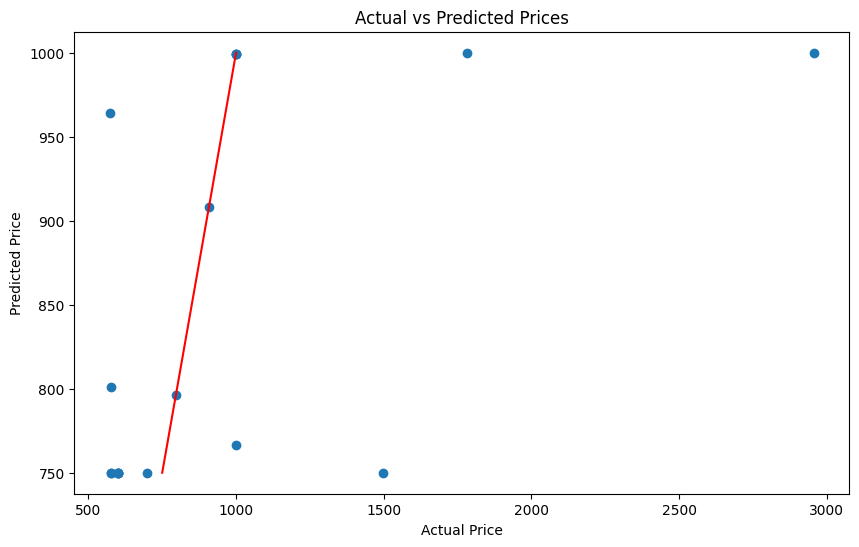

ValueError: Length of values (30) does not match length of index (3)

<Figure size 1000x600 with 0 Axes>

In [6]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error

# Load the scraped data
df = pd.read_csv("delhiclean.csv")

# Define the features and target
X = df[["distance", "ratings", "wifi"]]
y = df["price"]

# Normalize the features
X = (X - X.mean()) / X.std()

# Reshape the data into sequences of length 10
# Each sequence contains 10 consecutive days of data
X_seq = np.array([X[i:i+10] for i in range(len(X)-10)])
y_seq = np.array([y[i+10] for i in range(len(y)-10)])

# Split the data into train and test sets
X_train_seq, X_test_seq, y_train, y_test = train_test_split(
    X_seq, y_seq, test_size=0.2, random_state=2)

# Flatten the input sequences
X_train = X_train_seq.reshape(X_train_seq.shape[0], -1)
X_test = X_test_seq.reshape(X_test_seq.shape[0], -1)

# Train the XGBoost model
model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100)
model.fit(X_train, y_train)

# Get the user-defined price range
lower_price_limit = float(input("Enter lower price limit: "))
upper_price_limit = float(input("Enter upper price limit: "))

# Make predictions on the test set
y_pred = model.predict(X_test)

# Clip the predictions to the price range
y_pred_clipped = np.clip(y_pred, lower_price_limit, upper_price_limit)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred_clipped)
mae = mean_absolute_error(y_test, y_pred_clipped)
evs = explained_variance_score(y_test, y_pred_clipped)
r2 = r2_score(y_test, y_pred_clipped)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"EVS: {evs:.2f}")
print(f"R2: {r2:.2f}")

# Plot the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_clipped)
plt.plot([lower_price_limit, upper_price_limit], [
         lower_price_limit, upper_price_limit], color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

# Plot the feature importance
plt.figure(figsize=(10, 6))
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

# Plot the residuals
plt.figure(figsize=(10, 6))
sns.residplot(y_test, y_pred_clipped, lowess=True)
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [4]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error

# Load the scraped data
df = pd.read_csv("newdelhi.csv")

# Define the features and target
X = df[["distance", "ratings"]]
y = df["price"]

# Check for NaN or infinity values in y
if np.isnan(y).any() or np.isinf(y).any():
    raise ValueError("y contains NaN, infinity or a value too large")

# Normalize the features
X = (X - X.mean()) / X.std()

# Reshape the data into sequences of length 10
# Each sequence contains 10 consecutive days of data
X_seq = np.array([X[i:i+10] for i in range(len(X)-10)])
y_seq = np.array([y[i+10] for i in range(len(y)-10)])

# Split the data into train and test sets
X_train_seq, X_test_seq, y_train, y_test = train_test_split(
    X_seq, y_seq, test_size=0.2, random_state=2)

# Flatten the input sequences
X_train = X_train_seq.reshape(X_train_seq.shape[0], -1)
X_test = X_test_seq.reshape(X_test_seq.shape[0], -1)

# Train the XGBoost model
model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100)
model.fit(X_train, y_train)

# Get the user-defined price range
lower_price_limit = float(input("Enter lower price limit: "))
upper_price_limit = float(input("Enter upper price limit: "))

# Make predictions on the test set
y_pred = model.predict(X_test)

# Clip the predictions to the price range
y_pred_clipped = np.clip(y_pred, lower_price_limit, upper_price_limit)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred_clipped)
mae = mean_absolute_error(y_test, y_pred_clipped)
evs = explained_variance_score(y_test, y_pred_clipped)
r2 = r2_score(y_test, y_pred_clipped)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"EVS: {evs:.2f}")
print(f"R2: {r2:.2f}")


ValueError: y contains NaN, infinity or a value too large